In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


C:\Users\gopal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data=pd.read_csv("train.csv")
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  131662
Number of features :  14
Features :  ['Trip_ID' 'Trip_Distance' 'Type_of_Cab' 'Customer_Since_Months'
 'Life_Style_Index' 'Confidence_Life_Style_Index' 'Destination_Type'
 'Customer_Rating' 'Cancellation_Last_1Month' 'Var1' 'Var2' 'Var3'
 'Gender' 'Surge_Pricing_Type']


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [3]:
data_test=pd.read_csv("test.csv")
print('Number of data points : ', data_test.shape[0])
print('Number of features : ', data_test.shape[1])
print('Features : ', data_test.columns.values)
data_test.head()

Number of data points :  87395
Number of features :  13
Features :  ['Trip_ID' 'Trip_Distance' 'Type_of_Cab' 'Customer_Since_Months'
 'Life_Style_Index' 'Confidence_Life_Style_Index' 'Destination_Type'
 'Customer_Rating' 'Cancellation_Last_1Month' 'Var1' 'Var2' 'Var3'
 'Gender']


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [4]:
train_len = len(data)
dataset =  pd.concat(objs=[data, data_test], axis=0).reset_index(drop=True)

In [5]:
dataset.head()

,Cancellation_Last_1Month,Confidence_Life_Style_Index,Customer_Rating,Customer_Since_Months,Destination_Type,Gender,Life_Style_Index,Surge_Pricing_Type,Trip_Distance,Trip_ID,Type_of_Cab,Var1,Var2,Var3
0,0,A,3.90500,1.0,A,Female,2.42769,2.0,6.77,T0005689460,B,40.0,46,60
1,0,B,3.45000,10.0,A,Male,2.78245,2.0,29.47,T0005689461,B,38.0,56,78
2,2,NaN,3.50125,10.0,E,Male,NaN,2.0,41.58,T0005689464,NaN,NaN,56,77
3,0,NaN,3.45375,10.0,A,Male,NaN,3.0,61.56,T0005689465,C,NaN,52,74
4,4,B,3.40250,10.0,A,Male,3.03453,2.0,54.95,T0005689467,C,51.0,49,102


In [6]:
dataset.isnull().sum()

Cancellation_Last_1Month            0
Confidence_Life_Style_Index     33520
Customer_Rating                     0
Customer_Since_Months            9886
Destination_Type                    0
Gender                              0
Life_Style_Index                33520
Surge_Pricing_Type              87395
Trip_Distance                       0
Trip_ID                             0
Type_of_Cab                     33368
Var1                           117819
Var2                                0
Var3                                0
dtype: int64

In [7]:


dataset.shape


(219057, 14)

In [8]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 14 columns):
Cancellation_Last_1Month       219057 non-null int64
Confidence_Life_Style_Index    185537 non-null object
Customer_Rating                219057 non-null float64
Customer_Since_Months          209171 non-null float64
Destination_Type               219057 non-null object
Gender                         219057 non-null object
Life_Style_Index               185537 non-null float64
Surge_Pricing_Type             131662 non-null float64
Trip_Distance                  219057 non-null float64
Trip_ID                        219057 non-null object
Type_of_Cab                    185689 non-null object
Var1                           101238 non-null float64
Var2                           219057 non-null int64
Var3                           219057 non-null int64
dtypes: float64(6), int64(3), object(5)
memory usage: 23.4+ MB


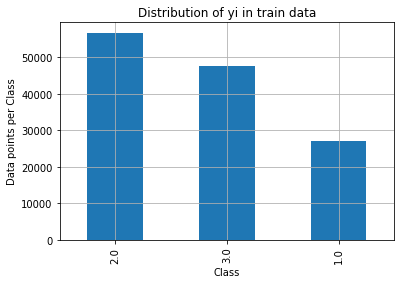

In [9]:
dataset_class_distribution = dataset['Surge_Pricing_Type'].value_counts()

my_colors = 'rgbkymc'
dataset_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [10]:
dataset['Type_of_Cab'].value_counts()

B    51585
C    46732
A    35878
D    31885
E    19609
Name: Type_of_Cab, dtype: int64

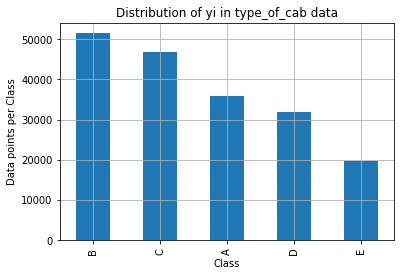

In [11]:
train_class_distribution_type_of_cab = dataset['Type_of_Cab'].value_counts()

my_colors = 'rgbkymc'
train_class_distribution_type_of_cab.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in type_of_cab data')
plt.grid()
plt.show()

In [12]:
def partition(x):
    if x=='A':
        return 1
    elif x=='B':
        return 2
    elif x=='C':
        return 3
    elif x=='D':
        return 4
    elif x=='E':
        return 5
actual_type=dataset['Type_of_Cab']
Type_of_cab_data=actual_type.map(partition)
dataset['Type_of_Cab']=Type_of_cab_data
print("Number of data points in our data", dataset.shape)
    
    

Number of data points in our data (219057, 14)


In [13]:
dataset[~(dataset['Type_of_Cab'].isin(['1','2','3' ,'4','5']))]

,Cancellation_Last_1Month,Confidence_Life_Style_Index,Customer_Rating,Customer_Since_Months,Destination_Type,Gender,Life_Style_Index,Surge_Pricing_Type,Trip_Distance,Trip_ID,Type_of_Cab,Var1,Var2,Var3
2,2,NaN,3.50125,10.0,E,Male,NaN,2.0,41.58,T0005689464,NaN,NaN,56,77
11,1,C,2.93500,0.0,C,Male,2.95327,2.0,90.93,T0005689477,NaN,NaN,46,63
15,1,A,3.19750,1.0,A,Female,2.16167,2.0,14.18,T0005689485,NaN,NaN,46,57
28,1,C,3.15125,10.0,B,Male,2.70044,1.0,31.82,T0005689505,NaN,NaN,51,66
32,0,A,3.15875,4.0,B,Male,2.59621,1.0,18.34,T0005689509,NaN,NaN,53,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219031,2,NaN,1.25875,0.0,G,Male,NaN,NaN,16.62,T0005908451,NaN,NaN,66,93
219037,0,A,3.55750,4.0,B,Male,2.70295,NaN,17.07,T0005908468,NaN,NaN,47,65
219041,0,A,3.41500,0.0,B,Female,2.18845,NaN,20.50,T0005908477,NaN,NaN,43,57
219043,2,C,2.76125,5.0,A,Female,2.61062,NaN,20.45,T0005908482,NaN,109.0,47,65


In [14]:
dataset.drop(dataset[dataset["Type_of_Cab"].isnull() & (dataset["Customer_Since_Months"].isnull())].index)

,Cancellation_Last_1Month,Confidence_Life_Style_Index,Customer_Rating,Customer_Since_Months,Destination_Type,Gender,Life_Style_Index,Surge_Pricing_Type,Trip_Distance,Trip_ID,Type_of_Cab,Var1,Var2,Var3
0,0,A,3.90500,1.0,A,Female,2.42769,2.0,6.77,T0005689460,2.0,40.0,46,60
1,0,B,3.45000,10.0,A,Male,2.78245,2.0,29.47,T0005689461,2.0,38.0,56,78
2,2,NaN,3.50125,10.0,E,Male,NaN,2.0,41.58,T0005689464,NaN,NaN,56,77
3,0,NaN,3.45375,10.0,A,Male,NaN,3.0,61.56,T0005689465,3.0,NaN,52,74
4,4,B,3.40250,10.0,A,Male,3.03453,2.0,54.95,T0005689467,3.0,51.0,49,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219052,0,C,0.99750,3.0,A,Female,2.40720,NaN,29.43,T0005908503,3.0,74.0,48,72
219053,0,A,4.74375,10.0,D,Female,2.57009,NaN,14.83,T0005908504,3.0,109.0,42,60
219054,0,C,1.63500,6.0,A,Male,3.08227,NaN,37.86,T0005908505,1.0,NaN,57,77
219055,1,NaN,2.59875,1.0,J,Male,NaN,NaN,10.63,T0005908511,3.0,107.0,51,77


In [15]:
dataset['Type_of_Cab'].fillna((dataset['Type_of_Cab'].median()), inplace=True)

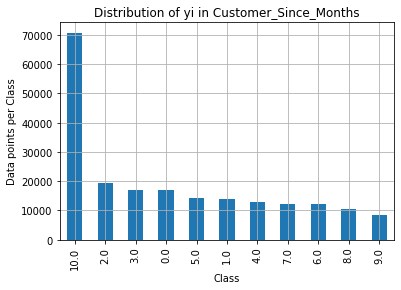

In [16]:
train_class_distribution_customer_since_months = dataset['Customer_Since_Months'].value_counts()

my_colors = 'rgbkymc'
train_class_distribution_customer_since_months.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in Customer_Since_Months')
plt.grid()
plt.show()

In [17]:
dataset[~(dataset['Customer_Since_Months'].isin(['1','2','3' ,'4','5','6','7','8','9','10','0']))]


,Cancellation_Last_1Month,Confidence_Life_Style_Index,Customer_Rating,Customer_Since_Months,Destination_Type,Gender,Life_Style_Index,Surge_Pricing_Type,Trip_Distance,Trip_ID,Type_of_Cab,Var1,Var2,Var3
13,0,B,2.14750,NaN,A,Female,2.69170,1.0,31.16,T0005689482,2.0,NaN,53,90
18,0,B,1.79750,NaN,B,Male,2.35974,2.0,13.94,T0005689491,2.0,NaN,50,64
35,0,B,1.83500,NaN,A,Male,2.70134,1.0,36.10,T0005689515,2.0,NaN,59,95
69,2,NaN,4.04875,NaN,L,Male,NaN,3.0,78.98,T0005689566,4.0,NaN,49,68
107,4,B,3.62625,NaN,A,Female,2.63792,1.0,21.46,T0005689632,2.0,NaN,47,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218935,0,B,3.32250,NaN,A,Male,2.58539,NaN,32.49,T0005908216,3.0,NaN,48,65
218966,0,C,3.33625,NaN,A,Male,3.04394,NaN,46.13,T0005908291,3.0,44.0,50,76
218990,1,B,2.85250,NaN,A,Female,2.18827,NaN,10.26,T0005908341,3.0,89.0,48,62
218993,0,B,0.98375,NaN,B,Male,2.17327,NaN,11.21,T0005908350,3.0,72.0,48,63


In [18]:
dataset['Customer_Since_Months'].fillna((dataset['Customer_Since_Months'].median()), inplace=True)

In [19]:
dataset['Life_Style_Index'].isnull().sum()

33520

In [20]:
dataset['Confidence_Life_Style_Index'].isnull().sum()

33520

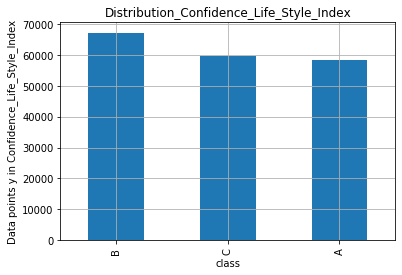

In [21]:
train_Confidence_Life_Style_Index=dataset['Confidence_Life_Style_Index'].value_counts()

color='rgbkymc'
train_Confidence_Life_Style_Index.plot(kind='bar')
plt.xlabel("class")
plt.ylabel("Data points y in Confidence_Life_Style_Index")
plt.title("Distribution_Confidence_Life_Style_Index")
plt.grid()
plt.show()

In [22]:
def new_partition(x):
    if x=='A':
        return 5.64
    elif x=='B':
        return 6.34
    elif x=='C':
        return 5.99
    
actual_type=dataset['Confidence_Life_Style_Index']
Confidence_Life_Style_Index=actual_type.map(new_partition)
dataset['Confidence_Life_Style_Index']=Confidence_Life_Style_Index
print("Number of data points in our data", dataset.shape)

Number of data points in our data (219057, 14)


In [23]:
def gender_change(x):
    if x=='Male':
        return 0
    elif x=='Female':
        return 1
    
actual_type=dataset['Gender']
gender=actual_type.map(gender_change)
dataset['Gender']=gender
print("Number of data points in our data", dataset.shape)

Number of data points in our data (219057, 14)


In [24]:
dataset.isnull().sum()

Cancellation_Last_1Month            0
Confidence_Life_Style_Index     33520
Customer_Rating                     0
Customer_Since_Months               0
Destination_Type                    0
Gender                              0
Life_Style_Index                33520
Surge_Pricing_Type              87395
Trip_Distance                       0
Trip_ID                             0
Type_of_Cab                         0
Var1                           117819
Var2                                0
Var3                                0
dtype: int64

In [25]:
dataset['Life_Style_Index'].median()

2.79828

In [26]:
dataset['Confidence_Life_Style_Index'].median()

5.99

In [27]:
dataset['Confidence_Life_Style_Index'].fillna((dataset['Confidence_Life_Style_Index'].median()), inplace=True)

In [28]:
dataset['Life_Style_Index'].fillna((dataset['Life_Style_Index'].median()), inplace=True)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 14 columns):
Cancellation_Last_1Month       219057 non-null int64
Confidence_Life_Style_Index    219057 non-null float64
Customer_Rating                219057 non-null float64
Customer_Since_Months          219057 non-null float64
Destination_Type               219057 non-null object
Gender                         219057 non-null int64
Life_Style_Index               219057 non-null float64
Surge_Pricing_Type             131662 non-null float64
Trip_Distance                  219057 non-null float64
Trip_ID                        219057 non-null object
Type_of_Cab                    219057 non-null float64
Var1                           101238 non-null float64
Var2                           219057 non-null int64
Var3                           219057 non-null int64
dtypes: float64(8), int64(4), object(2)
memory usage: 23.4+ MB


In [30]:
dataset['Var1']=dataset['Var1'].fillna(0)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 14 columns):
Cancellation_Last_1Month       219057 non-null int64
Confidence_Life_Style_Index    219057 non-null float64
Customer_Rating                219057 non-null float64
Customer_Since_Months          219057 non-null float64
Destination_Type               219057 non-null object
Gender                         219057 non-null int64
Life_Style_Index               219057 non-null float64
Surge_Pricing_Type             131662 non-null float64
Trip_Distance                  219057 non-null float64
Trip_ID                        219057 non-null object
Type_of_Cab                    219057 non-null float64
Var1                           219057 non-null float64
Var2                           219057 non-null int64
Var3                           219057 non-null int64
dtypes: float64(8), int64(4), object(2)
memory usage: 23.4+ MB


In [31]:
dataset['Destination_Type'].value_counts()

A    129010
B     49193
C     12397
D     11085
E      4549
F      3222
G      2513
H      2124
I      1334
J      1166
K      1102
L      1052
M       160
N       150
Name: Destination_Type, dtype: int64

In [32]:
def partition_new(x):
    if x=='A':
        return 1
    elif x=='B':
        return 2
    elif x=='C':
        return 3
    elif x=='D':
        return 4
    elif x=='E':
        return 5
    elif x=='F':
        return 6
    elif x=='G':
        return 7
    elif x=='H':
        return 8
    elif x=='I':
        return 9
    elif x=='J':
        return 10
    elif x=='K':
        return 11
    elif x=='L':
        return 12
    elif x=='M':
        return 13
    elif x=='N':
        return 14
    
    
actual_type=dataset['Destination_Type']
Destination_Type=actual_type.map(partition_new)
dataset['Destination_Type']=Destination_Type
print("Number of data points in our data", dataset.shape)
    
    

Number of data points in our data (219057, 14)


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 14 columns):
Cancellation_Last_1Month       219057 non-null int64
Confidence_Life_Style_Index    219057 non-null float64
Customer_Rating                219057 non-null float64
Customer_Since_Months          219057 non-null float64
Destination_Type               219057 non-null int64
Gender                         219057 non-null int64
Life_Style_Index               219057 non-null float64
Surge_Pricing_Type             131662 non-null float64
Trip_Distance                  219057 non-null float64
Trip_ID                        219057 non-null object
Type_of_Cab                    219057 non-null float64
Var1                           219057 non-null float64
Var2                           219057 non-null int64
Var3                           219057 non-null int64
dtypes: float64(8), int64(5), object(1)
memory usage: 23.4+ MB


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
le=LabelEncoder()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [44]:
dataset = pd.get_dummies(dataset.drop('Trip_ID', axis=1))
dataset.shape

(219057, 13)

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 13 columns):
Cancellation_Last_1Month       219057 non-null int64
Confidence_Life_Style_Index    219057 non-null float64
Customer_Rating                219057 non-null float64
Customer_Since_Months          219057 non-null float64
Destination_Type               219057 non-null int64
Gender                         219057 non-null int64
Life_Style_Index               219057 non-null float64
Surge_Pricing_Type             131662 non-null float64
Trip_Distance                  219057 non-null float64
Type_of_Cab                    219057 non-null float64
Var1                           219057 non-null float64
Var2                           219057 non-null int64
Var3                           219057 non-null int64
dtypes: float64(8), int64(5)
memory usage: 21.7 MB


In [46]:
X = dataset[dataset['Surge_Pricing_Type'].isnull()!=True].drop(['Surge_Pricing_Type'], axis=1)
y = dataset[dataset['Surge_Pricing_Type'].isnull()!=True]['Surge_Pricing_Type']

X_test = dataset[dataset['Surge_Pricing_Type'].isnull()==True].drop(['Surge_Pricing_Type'], axis=1)

X.shape, y.shape, X_test.shape

((131662, 12), (131662,), (87395, 12))

In [47]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [69]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((105329, 12), (26333, 12), (105329,), (26333,))

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [70]:

import xgboost as xgb

dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_val)

In [71]:
params = {
    'max_depth': 6,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 4,
    'n_gpus': 0
}

In [72]:
bst = xgb.train(params, dtrain)

In [73]:
pred = bst.predict(dtest)

In [74]:
pred

array([3., 3., 1., ..., 2., 2., 3.], dtype=float32)

In [75]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         1.0       0.75      0.54      0.63      5413
         2.0       0.65      0.82      0.72     11316
         3.0       0.73      0.61      0.67      9604

    accuracy                           0.69     26333
   macro avg       0.71      0.66      0.67     26333
weighted avg       0.70      0.69      0.68     26333



In [76]:
cm = confusion_matrix(y_val, pred)
cm

array([[2907, 1967,  539],
       [ 406, 9315, 1595],
       [ 575, 3127, 5902]], dtype=int64)

In [77]:
submission = pd.DataFrame()
submission['Trip_ID'] = test['Trip_ID']
submission['Surge_Pricing_Type'] = pred_y[3]
submission.to_csv('XGB.csv', index=False, header=True)
submission.shape

(87395, 2)